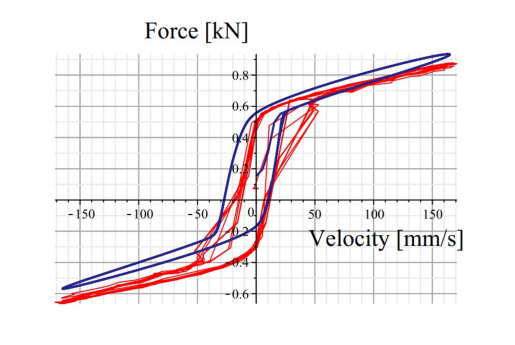

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image
image_path = "/content/Img2_BTP.jpg"

# Open the image using PIL
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

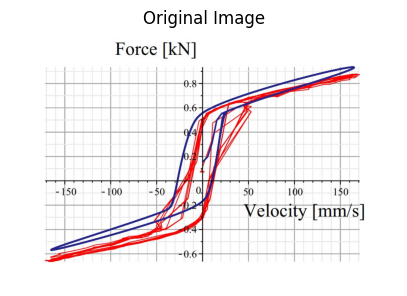

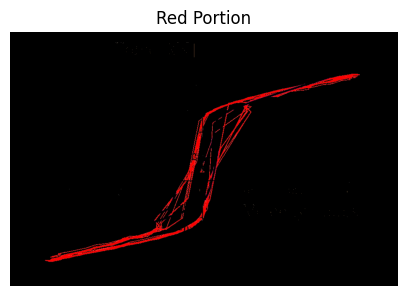

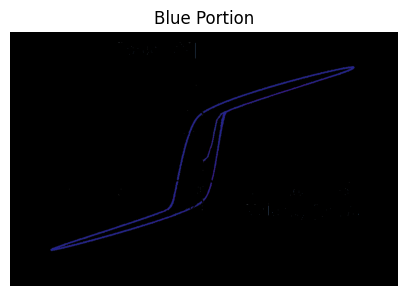

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
image_path = "/content/Img2_BTP.jpg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define lower and upper thresholds for red and blue color ranges
lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 100, 100])

lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])

# Create masks for red and blue portions
red_mask = cv2.inRange(image_rgb, lower_red, upper_red)
blue_mask = cv2.inRange(image_rgb, lower_blue, upper_blue)

# Apply the masks to the original image
red_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=red_mask)
blue_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=blue_mask)

# Save the segmented images
cv2.imwrite("red_segmented.jpg", cv2.cvtColor(red_segmented, cv2.COLOR_RGB2BGR))
cv2.imwrite("blue_segmented.jpg", cv2.cvtColor(blue_segmented, cv2.COLOR_RGB2BGR))

# Display the original image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Display the red segmented image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(red_segmented)
plt.title("Red Portion")
plt.axis('off')
plt.show()

# Display the blue segmented image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(blue_segmented)
plt.title("Blue Portion")
plt.axis('off')
plt.show()


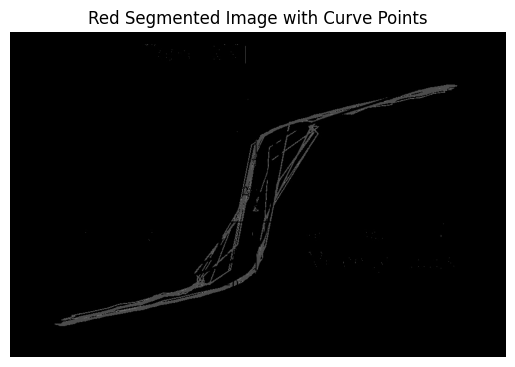

Selected curve points saved to selected_curve_points.csv


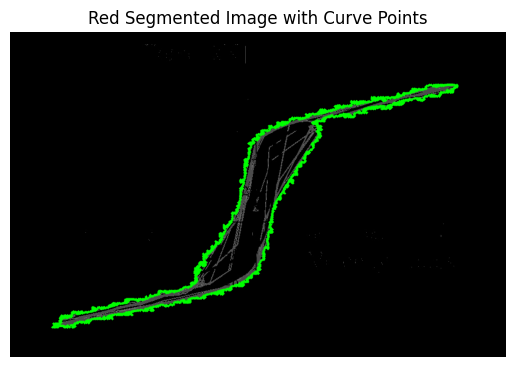

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

# Load the red segmented image
red_segmented_path = "red_segmented.jpg"
red_segmented = cv2.imread(red_segmented_path, cv2.IMREAD_GRAYSCALE)

# Find contours in the image
contours, _ = cv2.findContours(red_segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Choose the largest contour (assuming it's the curve you're interested in)
largest_contour = max(contours, key=cv2.contourArea)

# Get points along the largest contour
num_points = 10000
curve_points = []

# Interpolate points along the curve
curve_points = [tuple(point[0]) for point in largest_contour]

# If you want more points, you can interpolate between consecutive points
interpolated_curve_points = []
for i in range(len(curve_points) - 1):
    x1, y1 = curve_points[i]
    x2, y2 = curve_points[i + 1]

    num_interpolated_points = int(np.sqrt((x2 - x1)**2 + (y2 - y1)**2))
    x_interpolated = np.linspace(x1, x2, num_interpolated_points)
    y_interpolated = np.linspace(y1, y2, num_interpolated_points)

    interpolated_curve_points.extend(zip(y_interpolated, x_interpolated))

# Ensure we have enough points for sampling
if len(interpolated_curve_points) <= num_points:
    selected_points = interpolated_curve_points
else:
    selected_indices = np.random.choice(len(interpolated_curve_points), num_points, replace=False)
    selected_points = [interpolated_curve_points[i] for i in selected_indices]

# Transform coordinates to the desired coordinate system
transformed_points = []
for point in selected_points:
    y, x = point
    new_x = (x / red_segmented.shape[1]) * (170 + 170) - 170
    new_y = (y / red_segmented.shape[0]) * (0.9 + 0.7) - 0.7
    transformed_points.append((new_y, new_x))

# Save transformed points to a CSV file
with open("transformed_curve_points.csv", "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Y", "X"])  # Header
    csv_writer.writerows(transformed_points)

# Display the curve points on the image
red_segmented_rgb = cv2.cvtColor(red_segmented, cv2.COLOR_GRAY2RGB)
for point in selected_points:
    y, x = point
    cv2.circle(red_segmented_rgb, (int(x), int(y)), 2, (0, 255, 0), -1)  # Green color

# Display the image with curve points
plt.imshow(red_segmented_rgb)
plt.title("Red Segmented Image with Curve Points")
plt.axis('off')
plt.show()
